# Data Wraggling

## 0. Upload Data

In [1]:
import re 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
gov_dataset = pd.read_csv("14100092.csv")

## 1. Observe/Explore Data

In [3]:
# A glipse of the whole dataset
gov_dataset

,REF_DATE,GEO,DGUID,North American Industry Classification System (NAICS),UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2001,Canada,2016A000011124,"Total employed, all industries",Persons,249,thousands,3,v91416396,1.10,14932.3,NaN,NaN,NaN,1
1,2001,Canada,2016A000011124,Goods-producing sector,Persons,249,thousands,3,v91416397,1.20,3766.4,NaN,NaN,NaN,1
2,2001,Canada,2016A000011124,"Agriculture [111-112, 1100, 1151-1152]",Persons,249,thousands,3,v91416398,1.30,322.6,NaN,NaN,NaN,1
3,2001,Canada,2016A000011124,"Forestry, fishing, mining, quarrying, oil and ...",Persons,249,thousands,3,v91416399,1.40,276.4,NaN,NaN,NaN,1
4,2001,Canada,2016A000011124,Utilities [22],Persons,249,thousands,3,v91416400,1.50,122.8,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28875,2020,"Northeast, British Columbia",2011S05005980,Health care and social assistance [62],Persons,249,thousands,3,v91417835,79.15,3.8,NaN,NaN,NaN,1
28876,2020,"Northeast, British Columbia",2011S05005980,"Information, culture and recreation [51, 71]",Persons,249,thousands,3,v91417836,79.16,NaN,x,NaN,NaN,1
28877,2020,"Northeast, British Columbia",2011S05005980,Accommodation and food services [72],Persons,249,thousands,3,v91417837,79.17,2.2,NaN,NaN,NaN,1
28878,2020,"Northeast, British Columbia",2011S05005980,Other services (except public administration) ...,Persons,249,thousands,3,v91417838,79.18,2.5,NaN,NaN,NaN,1


In [4]:
# The data type of each column
gov_dataset.dtypes

REF_DATE                                                   int64
GEO                                                       object
DGUID                                                     object
North American Industry Classification System (NAICS)     object
UOM                                                       object
UOM_ID                                                     int64
SCALAR_FACTOR                                             object
SCALAR_ID                                                  int64
VECTOR                                                    object
COORDINATE                                               float64
VALUE                                                    float64
STATUS                                                    object
SYMBOL                                                   float64
TERMINATED                                               float64
DECIMALS                                                   int64
dtype: object

In [5]:
# check the number of each unique value per column
gov_dataset.nunique()

REF_DATE                                                   20
GEO                                                        76
DGUID                                                      69
North American Industry Classification System (NAICS)      19
UOM                                                         1
UOM_ID                                                      1
SCALAR_FACTOR                                               1
SCALAR_ID                                                   1
VECTOR                                                   1444
COORDINATE                                               1368
VALUE                                                    3738
STATUS                                                      1
SYMBOL                                                      0
TERMINATED                                                  0
DECIMALS                                                    1
dtype: int64

In [6]:
# what exactly are those 19 industiry catogories? How many rows/items for each industry?
gov_dataset.groupby(by=['North American Industry Classification System (NAICS)']).size()

North American Industry Classification System (NAICS)
Accommodation and food services [72]                                           1520
Agriculture [111-112, 1100, 1151-1152]                                         1520
Business, building and other support services [55-56]                          1520
Construction [23]                                                              1520
Educational services [61]                                                      1520
Finance, insurance, real estate, rental and leasing [52-53]                    1520
Forestry, fishing, mining, quarrying, oil and gas [21, 113-114, 1153, 2100]    1520
Goods-producing sector                                                         1520
Health care and social assistance [62]                                         1520
Information, culture and recreation [51, 71]                                   1520
Manufacturing [31-33]                                                          1520
Other services (except

In [7]:
# what exactly are those 76 locations? How many rows/items for each location?
gov_dataset.groupby(by=['GEO']).size()

GEO
Abitibi-Témiscamingue, Quebec                                                          380
Alberta                                                                                380
Annapolis Valley, Nova Scotia                                                          380
Avalon Peninsula, Newfoundland and Labrador                                            380
Banff-Jasper-Rocky Mountain House and Athabasca-Grande Prairie-Peace River, Alberta    380
                                                                                      ... 
West Coast-Northern Peninsula-Labrador, Newfoundland and Labrador                      380
Windsor-Sarnia, Ontario                                                                380
Winnipeg, Manitoba                                                                     380
Wood Buffalo-Cold Lake, Alberta                                                        380
Yorkton-Melville, Saskatchewan                                                        

In [8]:
# same logic as above
gov_dataset.groupby(by=['DGUID']).size()

DGUID
2011S05001010    380
2011S05001030    380
2011S05001210    380
2011S05001220    380
2011S05001230    380
                ... 
2016A000235      380
2016A000246      380
2016A000247      380
2016A000248      380
2016A000259      380
Length: 69, dtype: int64

### Summary

<br> **REF_DATE**: Year 2001 to 2020
<br> GEO: Geographical locations- unstructured- can we use group by function?
<br>  DGUID: https://www150.statcan.gc.ca/n1/pub/92f0138m/92f0138m2019001-eng.htm
* to figure out the relationships between GEO and DGUID- my exploration indicates all GEO (380x 76) covers DGUID (380x 69) so we can only leave out GEO for analysis
* what are those 7 (76-69) GEO which do not have an according DGUID?

<br>  **NAICS**: industires
<br>  UMO & UMO_ID: Unit of measurement (to delete)
<br>  SCALAR_FACTOR & SCALAR_ID: thousands (to delete since no specific meaning to each item)
<br>  VECTOR: to reserach
<br>  COORDINATE: to research

<br>  **VALUE**: the number of peaple
<br>  STATUS: only indicate that those do not have value
<br>  SYMBOL: null (to delete)
<br>  TERMINATED: null (to delete)
<br>  DECIMALS: meaning one decimal (to delete since no specific meaning to each item)

**To delete**
* UOM                                                         1
* UOM_ID                                                      1
* SCALAR_FACTOR                                               1
* SCALAR_ID                                                   1
* STATUS                                                      1 -----------> this is a flag
* SYMBOL                                                      0
* TERMINATED  
* DECIMALS

### Experiment- how to use vector & coordinates in our dataset
* R https://mountainmath.github.io/cansim/articles/retrieving_cansim_vectors.html
* Python https://towardsdatascience.com/how-to-collect-data-from-statistics-canada-using-python-db8a81ce6475


In [9]:
pip install stats-can

Note: you may need to restart the kernel to use updated packages.


In [10]:
import stats_can
df = stats_can.sc.vectors_to_df('v91416396', periods = 6)

In [11]:
df.columns = ['GDP']
df.index.names = ['Date']

In [12]:
df

,GDP
Date,
2015-01-01,17946.6
2016-01-01,18079.9
2017-01-01,18416.4
2018-01-01,18657.5
2019-01-01,19055.7
2020-01-01,18059.5


## 2. Access, Slice and Select Data

In [13]:
# I want to verify if my conclusion above is correct:
## that all GEO (380x 76) covers DGUID (380x 69) 
## and those 7 (76-69) GEO which do not have an according DGUID
DGUID_NULL= gov_dataset[gov_dataset['DGUID'].isna()]
DGUID_NULL.nunique()

REF_DATE                                                  20
GEO                                                        7
DGUID                                                      0
North American Industry Classification System (NAICS)     19
UOM                                                        1
UOM_ID                                                     1
SCALAR_FACTOR                                              1
SCALAR_ID                                                  1
VECTOR                                                   133
COORDINATE                                               126
VALUE                                                    453
STATUS                                                     1
SYMBOL                                                     0
TERMINATED                                                 0
DECIMALS                                                   1
dtype: int64

In [14]:
# I want to see what are exactly those 7 GEOs whose DGUID is null.
DGUID_NULL.groupby(by=['GEO']).size()

GEO
Banff-Jasper-Rocky Mountain House and Athabasca-Grande Prairie-Peace River, Alberta            380
Côte-Nord and Nord-du-Québec, Quebec                                                           380
North Coast and Nechako, British Columbia                                                      380
Parklands and North, Manitoba                                                                  380
Prince Albert and Northern, Saskatchewan                                                       380
South Central and North Central, Manitoba                                                      380
South Coast-Burin Peninsula and Notre Dame-Central Bonavista Bay, Newfoundland and Labrador    380
dtype: int64

In [15]:
# I notice that the 'x' in STATUS colunm maybe a flag for those who do not have values in VALUE column- to verify this  
gov_dataset[gov_dataset['STATUS']== 'x'].nunique()

REF_DATE                                                  20
GEO                                                       59
DGUID                                                     52
North American Industry Classification System (NAICS)     13
UOM                                                        1
UOM_ID                                                     1
SCALAR_FACTOR                                              1
SCALAR_ID                                                  1
VECTOR                                                   142
COORDINATE                                               142
VALUE                                                      0
STATUS                                                     1
SYMBOL                                                     0
TERMINATED                                                 0
DECIMALS                                                   1
dtype: int64

### Summary
<br> Those rows with a flag in **STATUS** do not have any value in **VALUE** colunms, so my assumption is correct
<br> **GEO** covers all **DGUID** so that DGUID can be deleted as well - not 100% sure, to discuss
<br> Again, we can delete the following colunms now:

* UOM                                                         
* UOM_ID                                                      
* SCALAR_FACTOR                                               
* SCALAR_ID                                                   
* STATUS                                                      
* SYMBOL                                                      
* TERMINATED    
* DECIMALS

## 3 Clean data

In [16]:
my_dataset = gov_dataset.drop(columns=['UOM','UOM_ID','SCALAR_FACTOR','SCALAR_ID','STATUS','SYMBOL','TERMINATED','DECIMALS','DGUID']) 

In [17]:
# The new dataset after cleaning for visualization 
my_dataset

,REF_DATE,GEO,North American Industry Classification System (NAICS),VECTOR,COORDINATE,VALUE
0,2001,Canada,"Total employed, all industries",v91416396,1.10,14932.3
1,2001,Canada,Goods-producing sector,v91416397,1.20,3766.4
2,2001,Canada,"Agriculture [111-112, 1100, 1151-1152]",v91416398,1.30,322.6
3,2001,Canada,"Forestry, fishing, mining, quarrying, oil and ...",v91416399,1.40,276.4
4,2001,Canada,Utilities [22],v91416400,1.50,122.8
...,...,...,...,...,...,...
28875,2020,"Northeast, British Columbia",Health care and social assistance [62],v91417835,79.15,3.8
28876,2020,"Northeast, British Columbia","Information, culture and recreation [51, 71]",v91417836,79.16,NaN
28877,2020,"Northeast, British Columbia",Accommodation and food services [72],v91417837,79.17,2.2
28878,2020,"Northeast, British Columbia",Other services (except public administration) ...,v91417838,79.18,2.5


### Summary 
What we have confidence to use are:
* REF_DATE: They are Years- there are 20 years
* GEO v.s. DGUID: GEO indicates the specific locations- there are 76 locations (76 x 380= 28880)
* NAICS: there are 19 industry catogories (19 X 1520= 28880)
* Value: those are numbers of people (I did external research to confirm this, unit: thousands)
* vector & coordinate- more research needed...

# Data Visulization

In [19]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import random

In [41]:
# only focus on Canada for an overview of three dimentions: year, industy and number of employees
only_canada= my_dataset[my_dataset['GEO']== 'Canada']
only_canada_3d= only_canada.drop(columns=['GEO','VECTOR','COORDINATE'])  
only_canada_3d

,REF_DATE,North American Industry Classification System (NAICS),VALUE
0,2001,"Total employed, all industries",14932.3
1,2001,Goods-producing sector,3766.4
2,2001,"Agriculture [111-112, 1100, 1151-1152]",322.6
3,2001,"Forestry, fishing, mining, quarrying, oil and ...",276.4
4,2001,Utilities [22],122.8
...,...,...,...
27450,2020,Health care and social assistance [62],2445.5
27451,2020,"Information, culture and recreation [51, 71]",683.6
27452,2020,Accommodation and food services [72],940.8
27453,2020,Other services (except public administration) ...,733.0


In [64]:
# reshape the dataframe for visualizing
dataset_figure1 = only_canada_3d.pivot(index='REF_DATE',columns='North American Industry Classification System (NAICS)',values='VALUE')


In [69]:
# make index into a new column called "Year"- I found this is necessary because we need to call the column to plot data
dataset_figure1['Year'] = dataset_figure1.index
dataset_figure1

North American Industry Classification System (NAICS),Accommodation and food services [72],"Agriculture [111-112, 1100, 1151-1152]","Business, building and other support services [55-56]",Construction [23],Educational services [61],"Finance, insurance, real estate, rental and leasing [52-53]","Forestry, fishing, mining, quarrying, oil and gas [21, 113-114, 1153, 2100]",Goods-producing sector,Health care and social assistance [62],"Information, culture and recreation [51, 71]",Manufacturing [31-33],Other services (except public administration) [81],"Professional, scientific and technical services [54]",Public administration [91],Services-producing sector,"Total employed, all industries",Transportation and warehousing [48-49],Utilities [22],"Wholesale and retail trade [41, 44-45]",Year
REF_DATE,,,,,,,,,,,,,,,,,,,,
2001,948.1,322.6,532.9,822.6,974.2,876.3,276.4,3766.4,1545.5,710.0,2222.0,664.5,988.1,785.8,11165.9,14932.3,777.9,122.8,2362.7,2001
2002,985.1,323.7,581.8,863.0,1001.1,896.3,269.1,3875.9,1614.0,712.6,2288.9,686.1,987.2,794.7,11415.5,15291.3,757.9,131.1,2398.6,2002
2003,1002.3,330.0,608.0,910.6,1025.8,913.6,279.2,3927.8,1677.9,716.0,2277.4,711.7,1002.7,822.6,11733.0,15660.8,787.9,130.7,2464.7,2003
2004,1006.9,322.0,627.1,954.1,1034.0,951.5,284.9,3990.2,1723.2,733.1,2297.2,699.9,1012.9,830.4,11924.8,15915.0,805.2,132.1,2500.7,2004
2005,1001.2,342.1,650.1,1022.1,1102.4,983.6,309.5,4000.7,1723.4,728.0,2203.4,692.0,1041.1,835.7,12122.9,16123.5,796.0,123.5,2569.4,2005
2006,1018.1,346.3,680.6,1066.3,1155.2,1028.9,334.5,3970.8,1776.0,737.4,2102.2,696.2,1075.2,834.9,12425.2,16396.0,798.3,121.5,2624.3,2006
2007,1072.2,335.5,695.8,1127.3,1173.8,1046.3,342.4,3968.8,1838.5,774.8,2026.0,724.3,1124.0,865.4,12800.5,16769.3,820.6,137.5,2665.0,2007
2008,1088.5,330.1,704.3,1235.8,1163.5,1060.8,341.1,3980.5,1890.1,749.6,1927.2,761.1,1173.4,910.3,13029.7,17010.2,849.7,146.2,2678.4,2008
2009,1075.7,326.9,683.9,1189.6,1151.2,1067.1,314.4,3720.1,1961.6,747.3,1745.1,782.6,1149.9,918.6,13007.5,16727.6,824.6,144.1,2645.0,2009


In [65]:
dataset_figure1.nunique()

North American Industry Classification System (NAICS)
Accommodation and food services [72]                                           20
Agriculture [111-112, 1100, 1151-1152]                                         20
Business, building and other support services [55-56]                          19
Construction [23]                                                              20
Educational services [61]                                                      20
Finance, insurance, real estate, rental and leasing [52-53]                    20
Forestry, fishing, mining, quarrying, oil and gas [21, 113-114, 1153, 2100]    20
Goods-producing sector                                                         19
Health care and social assistance [62]                                         20
Information, culture and recreation [51, 71]                                   20
Manufacturing [31-33]                                                          20
Other services (except public administration

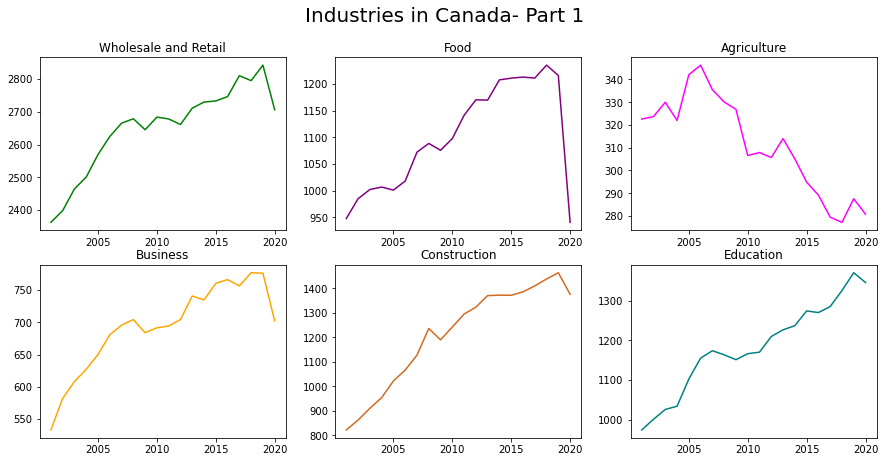

In [79]:
fig = plt.figure(figsize=(15,7))

fig.suptitle('Industries in Canada- Part 1', 
             fontsize=20)

ax1 = fig.add_subplot(231)
ax1.set_title('Wholesale and Retail')

ax1.plot(dataset_figure1['Year'],
         dataset_figure1['Wholesale and retail trade [41, 44-45]'], 
         color='green')

ax2 = fig.add_subplot(232)
ax2.set_title('Food')

ax2.plot(dataset_figure1['Year'],
         dataset_figure1['Accommodation and food services [72]'], 
         color='purple')

ax3 = fig.add_subplot(233)
ax3.set_title('Agriculture')

ax3.plot(dataset_figure1['Year'],
         dataset_figure1['Agriculture [111-112, 1100, 1151-1152]'], 
         color='magenta')

ax4 = fig.add_subplot(234)
ax4.set_title('Business')

ax4.plot(dataset_figure1['Year'],
         dataset_figure1['Business, building and other support services [55-56]'], 
         color='orange')

ax5 = fig.add_subplot(235)
ax5.set_title('Construction')

ax5.plot(dataset_figure1['Year'],
         dataset_figure1['Construction [23]'], 
         color='chocolate')

ax6 = fig.add_subplot(236)
ax6.set_title('Education')

ax6.plot(dataset_figure1['Year'],
         dataset_figure1['Educational services [61]'], 
         color='teal')

plt.show()

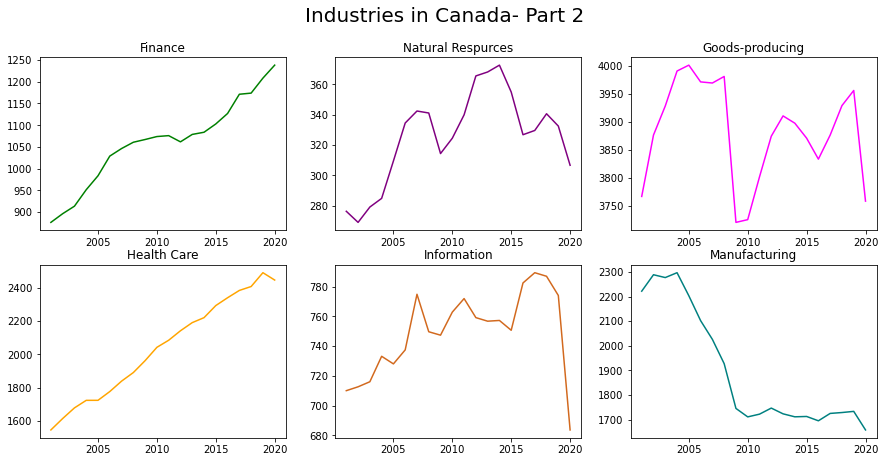

In [76]:
fig = plt.figure(figsize=(15,7))

fig.suptitle('Industries in Canada- Part 2', 
             fontsize=20)

ax7 = fig.add_subplot(231)
ax7.set_title('Finance')

ax7.plot(dataset_figure1['Year'],
         dataset_figure1['Finance, insurance, real estate, rental and leasing [52-53]'], 
         color='green')

ax8 = fig.add_subplot(232)
ax8.set_title('Natural Respurces')

ax8.plot(dataset_figure1['Year'],
         dataset_figure1['Forestry, fishing, mining, quarrying, oil and gas [21, 113-114, 1153, 2100]'], 
         color='purple')

ax9 = fig.add_subplot(233)
ax9.set_title('Goods-producing')

ax9.plot(dataset_figure1['Year'],
         dataset_figure1['Goods-producing sector'], 
         color='magenta')

ax10 = fig.add_subplot(234)
ax10.set_title('Health Care')

ax10.plot(dataset_figure1['Year'],
         dataset_figure1['Health care and social assistance [62]'], 
         color='orange')

ax10 = fig.add_subplot(235)
ax10.set_title('Information')

ax10.plot(dataset_figure1['Year'],
         dataset_figure1['Information, culture and recreation [51, 71]'], 
         color='chocolate')

ax10 = fig.add_subplot(236)
ax10.set_title('Manufacturing')

ax10.plot(dataset_figure1['Year'],
         dataset_figure1['Manufacturing [31-33]'], 
         color='teal')
plt.show()

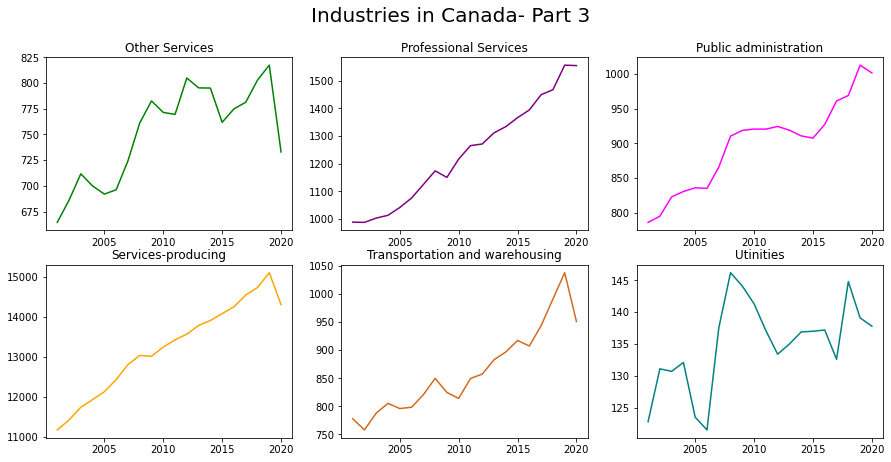

In [78]:
fig = plt.figure(figsize=(15,7))

fig.suptitle('Industries in Canada- Part 3', 
             fontsize=20)

ax11 = fig.add_subplot(231)
ax11.set_title('Other Services')

ax11.plot(dataset_figure1['Year'],
         dataset_figure1['Other services (except public administration) [81]'], 
         color='green')

ax12 = fig.add_subplot(232)
ax12.set_title('Professional Services')

ax12.plot(dataset_figure1['Year'],
         dataset_figure1['Professional, scientific and technical services [54]'], 
         color='purple')

ax13 = fig.add_subplot(233)
ax13.set_title('Public administration')

ax13.plot(dataset_figure1['Year'],
         dataset_figure1['Public administration [91]'], 
         color='magenta')

ax14 = fig.add_subplot(234)
ax14.set_title('Services-producing')

ax14.plot(dataset_figure1['Year'],
         dataset_figure1['Services-producing sector'], 
         color='orange')

ax15 = fig.add_subplot(235)
ax15.set_title('Transportation and warehousing')

ax15.plot(dataset_figure1['Year'],
         dataset_figure1['Transportation and warehousing [48-49]'], 
         color='chocolate')

ax16 = fig.add_subplot(236)
ax16.set_title('Utinities')

ax16.plot(dataset_figure1['Year'],
         dataset_figure1['Utilities [22]'], 
         color='teal')

plt.show()

### References
https://nbviewer.jupyter.org/github/BadreeshShetty/Data-Visualization-using-Matplotlib/blob/master/%283%29Time%20series.ipynb
https://stackoverflow.com/questions/20461165/how-to-convert-index-of-a-pandas-dataframe-into-a-column